In [6]:
# https://colab.research.google.com/github/spedas/pyspedas_examples/blob/mth5/pyspedas_examples/notebooks/mth5/THEMIS-ARTEMIS-Post-AGU2023_load_fdsn_example.ipynb
# Uncomment the "!pip install" lines below to use on Google Colab. Run this cell and restart the runtime kernel.
# !pip install pyspedas
# !pip install mth5

# If you encounter installation problem try to install the packages from the git repositories
# !pip install git+https://github.com/spedas/pyspedas.git
# !pip install git+https://github.com/kujaku11/mt_metadata.git
# !pip install git+https://github.com/kujaku11/mth5.git

# Load data into tplot variables

In [7]:
import pyspedas, pytplot
import numpy as np
from pyspedas.mth5.load_fdsn import load_fdsn

date_start = '2015-06-22T01:45:00'
date_end = '2015-06-22T02:20:00'
stations = ['ALW49', 'GAW50', 'REU49', 'TNV48', 'REP47', 'REQ48', 'TNU48']
fdsn_vars = []
for sta in stations:
   load_fdsn(network="4P", station=sta, trange=[date_start, date_end], 
             nodownload=True, noexception=True, nowarnings=True)
   fdsn_vars.append(f"fdsn_4P_{sta}_y")

pyspedas.themis.gmag(sites='frd', trange=[date_start, date_end], time_clip=True)

2024-03-11T18:17:49.610815-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_ALW49_20150622T014500_20150622T022000.h5
2024-03-11T18:17:51.329692-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAW50_20150622T014500_20150622T022000.h5
2024-03-11T18:17:53.548682-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REU49_20150622T014500_20150622T022000.h5
2024-03-11T18:17:55.162759-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_TNV48_20150622T014500_20150622T022000.h5
2024-03-11T18:17:56.641946-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REP47_20150622T014500_20150622T022000.h5
2024-03-11T18:17:58.438528-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REQ48_20150622T014500_20150622T022000.h5
2024-03-11T18:17:59.943939-0700 | INFO | mth5.mth5 | close_mth5 

11-Mar-24 18:17:59: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/frd/2015/
11-Mar-24 18:18:00: File is current: c:\work\Data\SPEDAS\themis\thg/l2/mag/frd/2015/thg_l2_mag_frd_20150622_v01.cdf
11-Mar-24 18:18:00: Time clip was applied to: thg_mag_frd


['thg_mag_frd']

# Process and visualize data

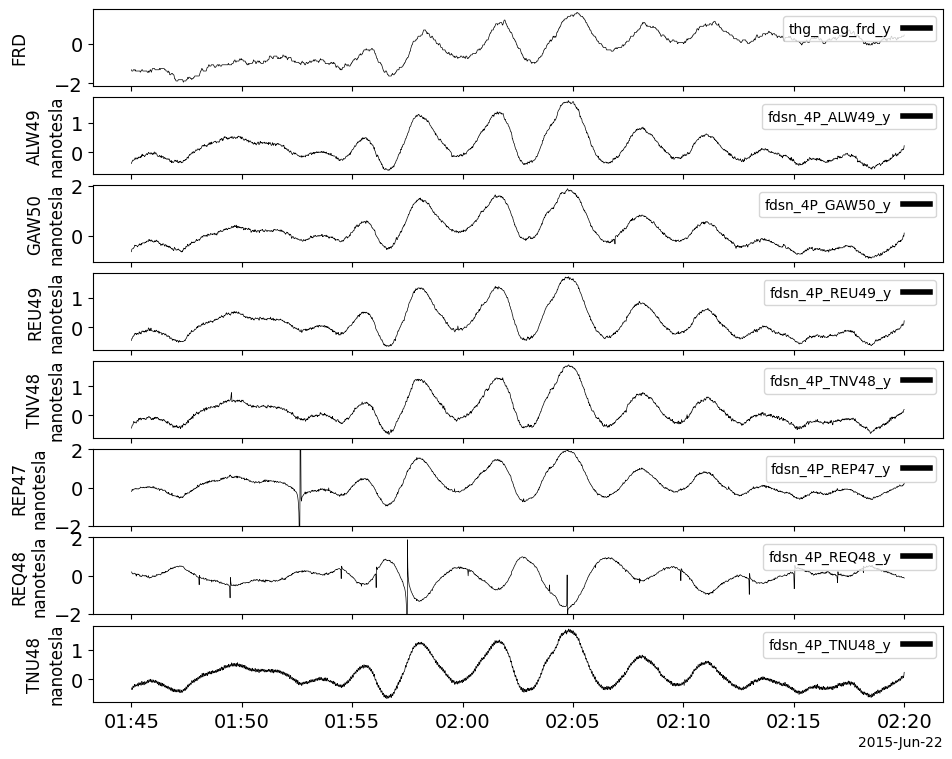

In [8]:
tplot_vars = ['thg_mag_frd_y'] + fdsn_vars 

for var in tplot_vars:   
   if pytplot.tnames(var[:-2]):
      pytplot.split_vec(var[:-2])
      time, by = pytplot.get_data(var)  # Unpack tplot variable
      by -= np.median(by)  # Subtract median   
   pytplot.options(var, opt_dict={"legend_names": [var], 
                                  "ytitle": var.split("_")[2].upper(),
                                  "name": ""}) # Remove name for the stack plot

# Pytplot options for outliers
pytplot.options('fdsn_4P_REQ48_y', 'yrange', [-2, 2])
pytplot.options('fdsn_4P_REP47_y', 'yrange', [-2, 2])
   
# Global tplot options
pytplot.tplot_options('vertical_spacing', 0.15)
pytplot.tplot_options('axis_font_size', 14)
   
pytplot.tplot(tplot_vars, xsize=10, ysize=9)